In [4]:
pip install nltk matplotlib scipy pyarrow fsspec scikit-learn wordcloud -q


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import nltk

# corpus de nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andrestrepo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrestrepo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to
[nltk_data]     /Users/andrestrepo/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andrestrepo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/andrestrepo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## preprocesamiento de textos

In [11]:
dataset_name = "AndresR2909/youtube_transcriptions_summaries_2025_gpt4.1"

splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
#sel_columns = ["channel_name","video_id","publish_date","year","month","number_of_tokenks","duration"]
df_test = pd.read_parquet(f"hf://datasets/{dataset_name}/" + splits["test"]) #columns=sel_columns)
df_train = pd.read_parquet(f"hf://datasets/{dataset_name}/" + splits["train"]) # columns= sel_columns)

df = pd.concat([df_train, df_test], ignore_index=True)
df.describe()

,duration,year,month,number_of_tokenks,__index_level_0__
count,2225.000000,2225.000000,1610.000000,2225.000000,2225.000000
mean,2569.023371,1464.053483,5.815528,7119.227416,1112.000000
std,2611.462873,905.064408,3.418246,6953.998787,642.446496
min,0.000000,0.000000,1.000000,34.000000,0.000000
25%,774.000000,0.000000,3.000000,2280.000000,556.000000
50%,1149.000000,2023.000000,5.000000,3408.000000,1112.000000
75%,4297.000000,2024.000000,9.000000,11767.000000,1668.000000
max,20978.000000,2025.000000,12.000000,42638.000000,2224.000000


In [12]:
print(df.iloc[-2]["text"])

bitcoin: cuidado con esto. a ver ahora sí parece que los tengo cómo les va mis amigos bienvenidos una vez más a usa crypto noticias manden por favor un saludo hola profesor am buenas profe mauro mochi hola profesor claudio crioyo saludos maestro buenas tardes no pudo hacer miembro con st usa no sé rubén quiro saludos maestro claudio criollo profe ahí le mando uno super chat gracias claudio croo los espero el vieja dice qué dice profe bueno aquí los veo estaba esperando su directo gracias amigo mío pocas personas conectadas miren quiero compartirles cosas muy importantes el día de hoy y voy a hablar rápidamente porque necesitamos desocupar noos rápido para ir a operar para ir a operar okay y este es el gráfico diario de bitcoin quiero compartirles algo mis amigos gráfico diario de bitcoin okay el gráfico diario de bitcoin parece que quisiera pasar parece que que quisiera pasar la línea de tendencia pareciera que la quiere pasar yo tengo que decirles varias cosas mis amigos yo todavía co

In [13]:
print(df.iloc[-2]["summary"])

- **Introducción:**  
El texto analizado corresponde a una transmisión en vivo de un analista de criptomonedas, centrada principalmente en el comportamiento reciente de Bitcoin (BTC) y la expectativa ante un inminente pronunciamiento de Jerome Powell, presidente de la Reserva Federal de EE. UU., sobre las tasas de interés. El enfoque está en la gestión de posiciones de trading, el uso del indicador RSI en diferentes temporalidades y la importancia de la gestión del riesgo ante eventos de alta volatilidad.

- **Puntos clave:**
  - El análisis se centra exclusivamente en Bitcoin, utilizando el gráfico diario y otras temporalidades (4 horas, 1 hora, 15 minutos).
  - El RSI (Índice de Fuerza Relativa) se encuentra en niveles de sobrecompra en todas las temporalidades analizadas, lo que históricamente ha precedido movimientos bajistas en el precio de Bitcoin.
  - El analista mantiene una posición en short (venta) desde el día anterior, protegida con un stop loss ajustado cerca de la línea d

In [14]:
print(df.iloc[-2]["key_terms"])

['Bitcoin (BTC)'
 'Bitget (exchange recomendado para operar futuros de criptomonedas)']


In [15]:
# Tokenizing the text in each row
df['tokenized_text'] = df['summary'].apply(lambda text: nltk.word_tokenize(str(text), language='spanish', preserve_line=True))

# Counting the number of tokens in each row
df['count_text'] = df['tokenized_text'].apply(len)

In [16]:
df['duration_min'] = df['duration'] / 60

In [18]:
df['channel_name'] = df['channel_name'].astype('category')
df_agrupado = df.groupby('video_id').first().reset_index()
df_agrupado[['duration_min', 'number_of_tokenks']].describe()

,duration_min,number_of_tokenks
count,2225.000000,2225.000000
mean,42.817056,7119.227416
std,43.524381,6953.998787
min,0.000000,34.000000
25%,12.900000,2280.000000
50%,19.150000,3408.000000
75%,71.616667,11767.000000
max,349.633333,42638.000000


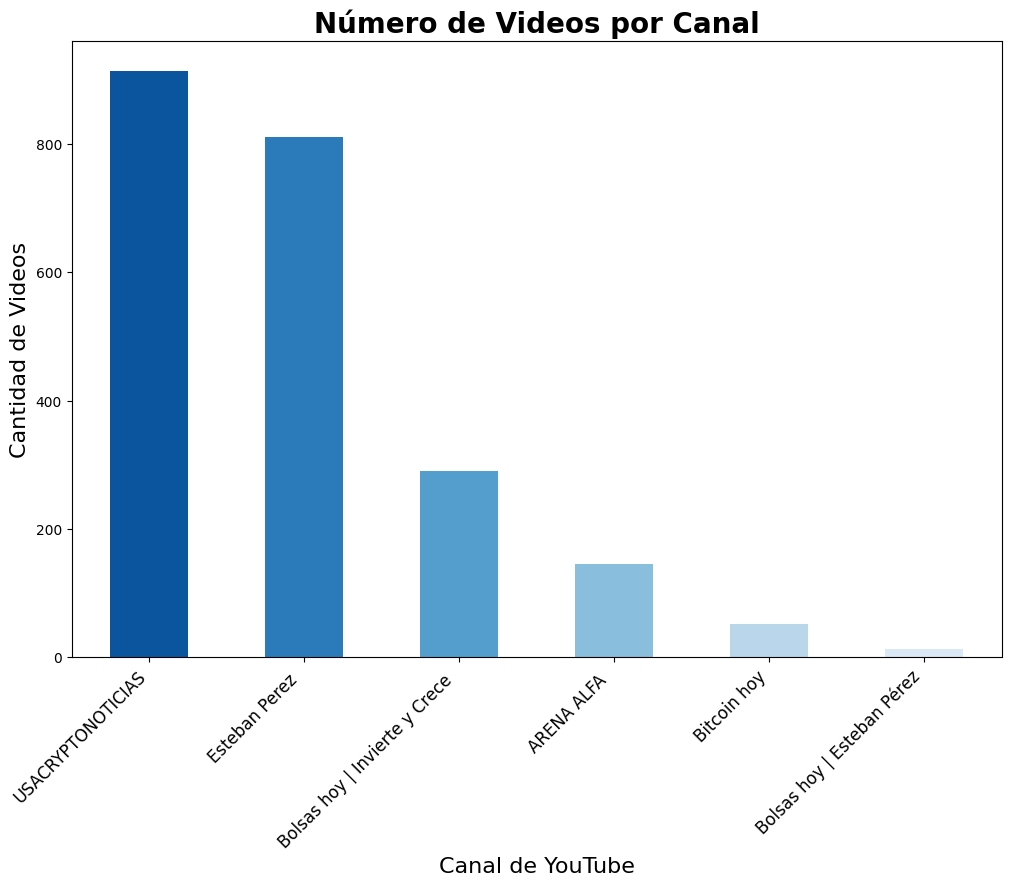

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el conteo de videos por canal
video_counts = df_agrupado['channel_name'].value_counts()

# Crear el gráfico de barras con una paleta en tonos de rojo
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Blues_r", len(video_counts))
video_counts.plot(kind='bar', color=colors)

# Títulos y etiquetas
plt.title('Número de Videos por Canal', fontsize=20, fontweight='bold')
plt.xlabel('Canal de YouTube', fontsize=16)
plt.ylabel('Cantidad de Videos', fontsize=16)

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar gráfico
plt.show()

/var/folders/0z/3s22b27525jc3bm0m923h36h3wg489/T/ipykernel_48799/4031913477.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_agrupado.groupby('channel_name')['number_of_tokenks'].mean()
/var/folders/0z/3s22b27525jc3bm0m923h36h3wg489/T/ipykernel_48799/4031913477.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_agrupado.groupby('channel_name')['number_of_tokenks'].median()
/var/folders/0z/3s22b27525jc3bm0m923h36h3wg489/T/ipykernel_48799/4031913477.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obser

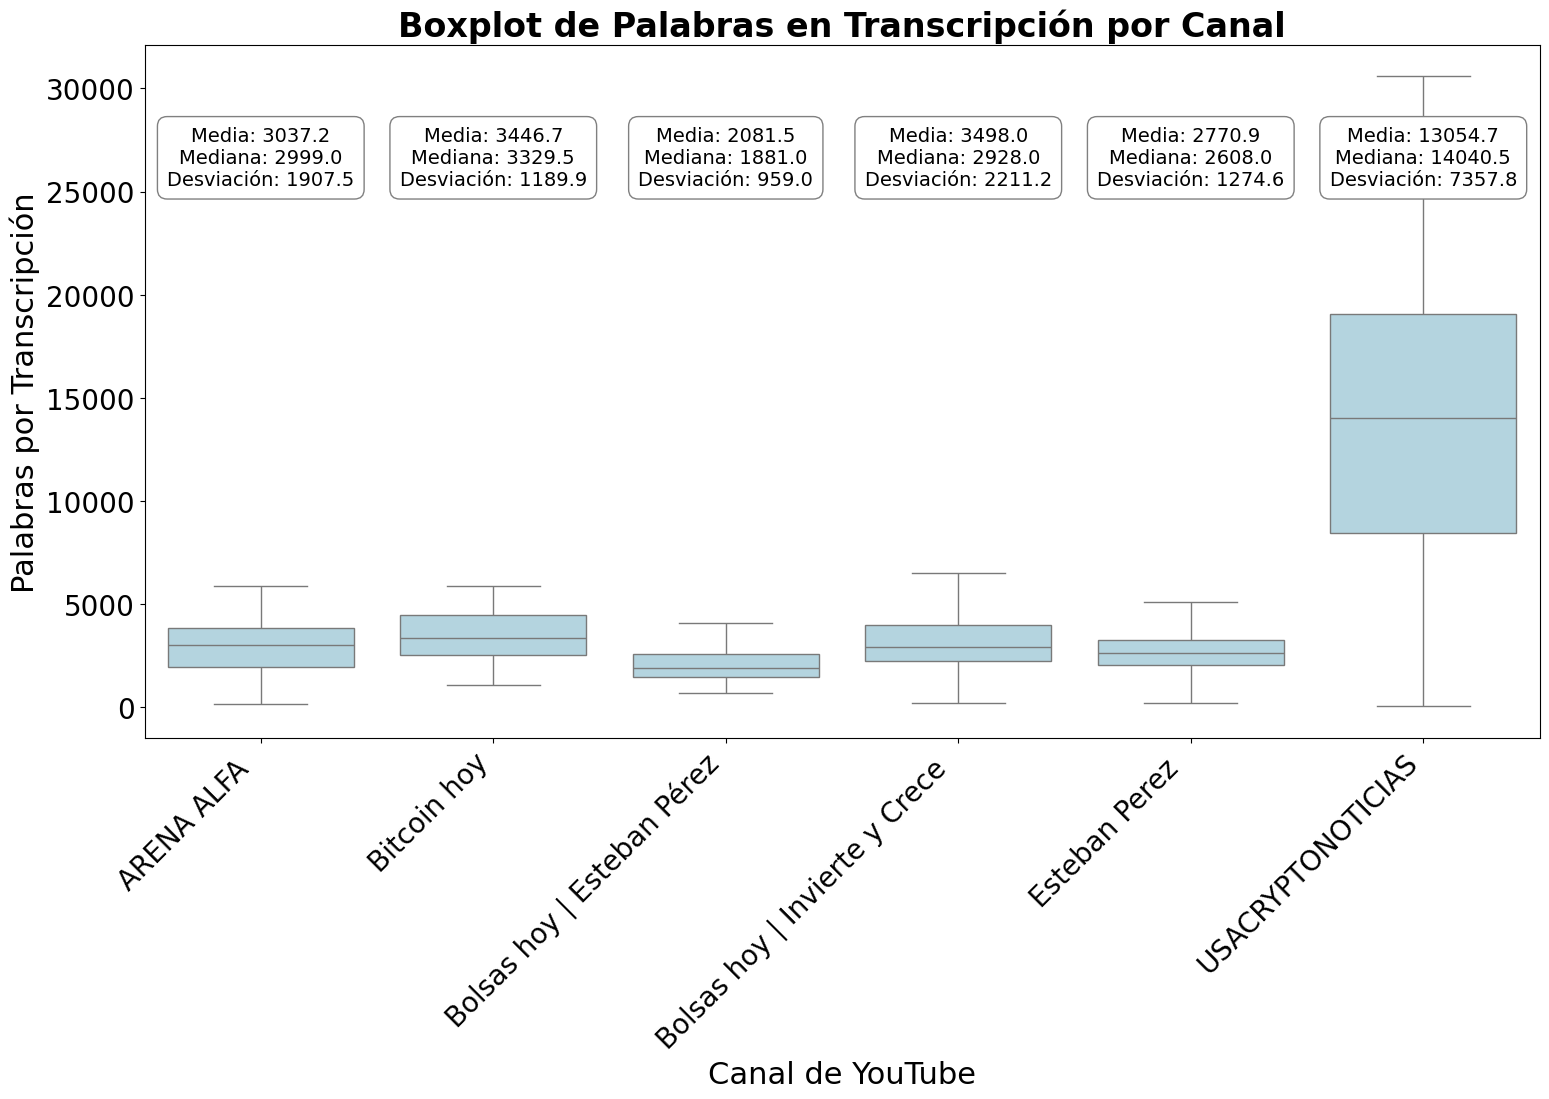

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot sin outliers
plt.figure(figsize=(18, 9))
ax = sns.boxplot(x='channel_name', y='number_of_tokenks', data=df_agrupado, showfliers=False, color='lightblue')#palette='Greys_r'

# Calcular la media, mediana y desviación estándar por cada grupo
means = df_agrupado.groupby('channel_name')['number_of_tokenks'].mean()
medians = df_agrupado.groupby('channel_name')['number_of_tokenks'].median()
std_devs = df_agrupado.groupby('channel_name')['number_of_tokenks'].std()
positions = range(len(means))

# Agregar anotaciones de la media, mediana y desviación estándar en un cuadro en la parte superior
for tick, label in zip(positions, ax.get_xticks()):
    # Obtener la media, mediana y desviación estándar para este grupo
    mean = means.iloc[tick]
    median = medians.iloc[tick]
    std_dev = std_devs.iloc[tick]
    
    # Agregar cuadro en la parte superior con media, mediana y desviación estándar
    ax.text(
        label, max(df['number_of_tokenks']) - 16000,  # Ajuste de posición en Y
        f'Media: {mean:.1f}\nMediana: {median:.1f}\nDesviación: {std_dev:.1f}',
        ha='center', va='center', 
        color='black', fontsize=14,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
    )

# Títulos y etiquetas con mayor tamaño de fuente
plt.title('Boxplot de Palabras en Transcripción por Canal', fontsize=24, fontweight='bold')
plt.xlabel('Canal de YouTube', fontsize=22)
plt.ylabel('Palabras por Transcripción', fontsize=22)

# Ajustar el tamaño de las etiquetas en el eje X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=20)

# Mostrar gráfico
plt.show()

## Precios de API

[precios](https://platform.openai.com/docs/pricing

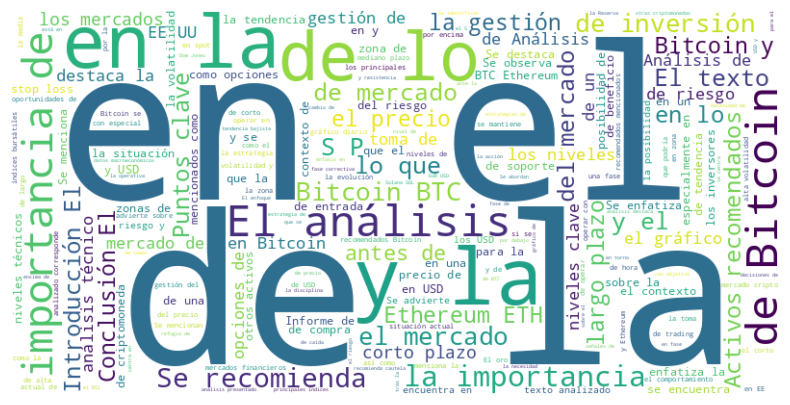

In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combinar todos los textos en un solo string
text = " ".join(review for review in df['summary'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    max_words=200, 
    background_color='white', 
    colormap='viridis',  # Cambiar el esquema de colores
    stopwords=None,      # Puedes añadir tus propias stopwords
    contour_color='steelblue', 
    contour_width=3
).generate(text)

In [34]:
def unir_tokens_from_lista(lista_tokens:list)->list:
    all_tokens = []
    for t in lista_tokens:
        all_tokens.extend(t)
    print("all_tokens_title =",len(all_tokens))
    return all_tokens 

In [35]:

def analisis_grafico_3(all_tokens: list, palabras_top: int = 10):
    # Análisis de frecuencia en palabras
    fdist = nltk.FreqDist(all_tokens)
    print('Size BoW =', len(fdist))
    
    # Palabras más comunes
    topwords = fdist.most_common(palabras_top)
    x, y = zip(*topwords)
    
    # Crear gráfico de barras horizontales
    plt.figure(figsize=(15, 10))
    
    # Usar un degradado de azul en la paleta de colores
    palette = sns.light_palette("blue", reverse=True, n_colors=palabras_top)  # Paleta en degradado azul
    
    # Graficar barras horizontales con el degradado
    plt.barh(x, y, color=palette)
    
    # Invertir el eje Y para que el ranking se vea de mayor a menor
    plt.gca().invert_yaxis()
    
    # Ajustar el tamaño de las etiquetas
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Etiquetas de los ejes
    plt.xlabel('Frecuencia', fontsize=16)
    plt.ylabel('Palabras', fontsize=16)
    
    # Mostrar gráfico
    plt.show()

In [39]:
df["channel_name"].unique()

['Bolsas hoy | Invierte y Crece ', 'USACRYPTONOTICIAS', 'Esteban Perez ', 'ARENA ALFA ', 'Bitcoin hoy', 'Bolsas hoy | Esteban Pérez']
Categories (6, object): ['ARENA ALFA ', 'Bitcoin hoy', 'Bolsas hoy | Esteban Pérez', 'Bolsas hoy | Invierte y Crece ', 'Esteban Perez ', 'USACRYPTONOTICIAS']

all_tokens_title = 1449750
Size BoW = 29305


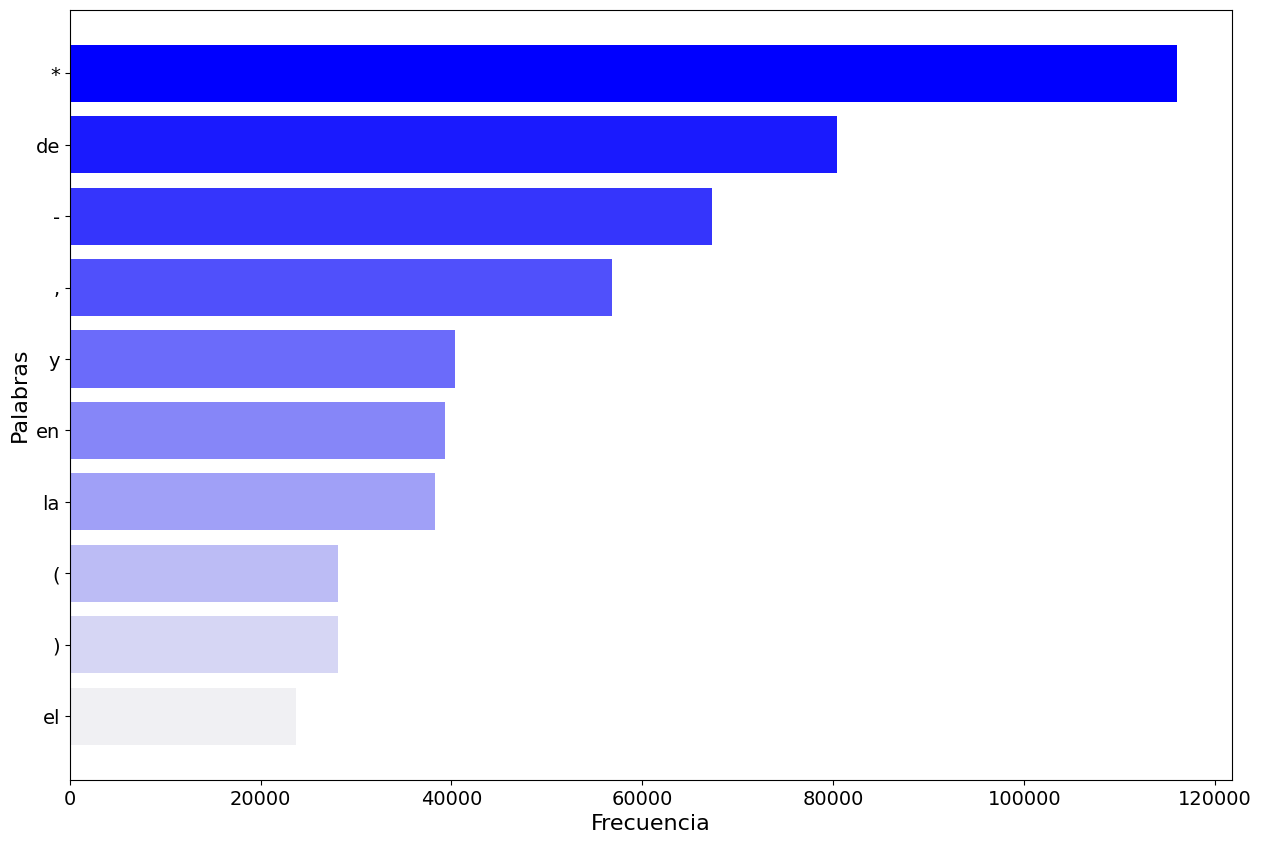

In [40]:
#lista_tokens = df[df["chanel_name"]==ARENA ALFA]["tokenized_text"].values
lista_tokens = df["tokenized_text"].values
all_tokens = unir_tokens_from_lista(lista_tokens)
analisis_grafico_3(all_tokens)


### preprocesamiento inicial y elimininacion de stop words

In [41]:
from nltk.corpus import stopwords
def quitar_tildes(s):  
    s = re.sub(r'[áàä]', 'a', s)  
    s = re.sub(r'[éèë]', 'e', s)  
    s = re.sub(r'[íìï]', 'i', s)  
    s = re.sub(r'[óòö]', 'o', s)  
    s = re.sub(r'[úùü]', 'u', s)  
    return s  

def preprocesamiento_and_stopwords(all_tokens):
    stop_words_nltk = set(stopwords.words('spanish'))
    prepro_tokens = [quitar_tildes(w) for w in all_tokens]
    prepro_tokens = [w.lower() for w in prepro_tokens]  
    prepro_tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in prepro_tokens]
    prepro_tokens = [w for w in prepro_tokens if w not in stop_words_nltk]
    prepro_tokens = [w for w in prepro_tokens if w.isalpha()]
    prepro_tokens = [w for w in prepro_tokens if len(w)>3]
    return prepro_tokens

Size BoW = 12576


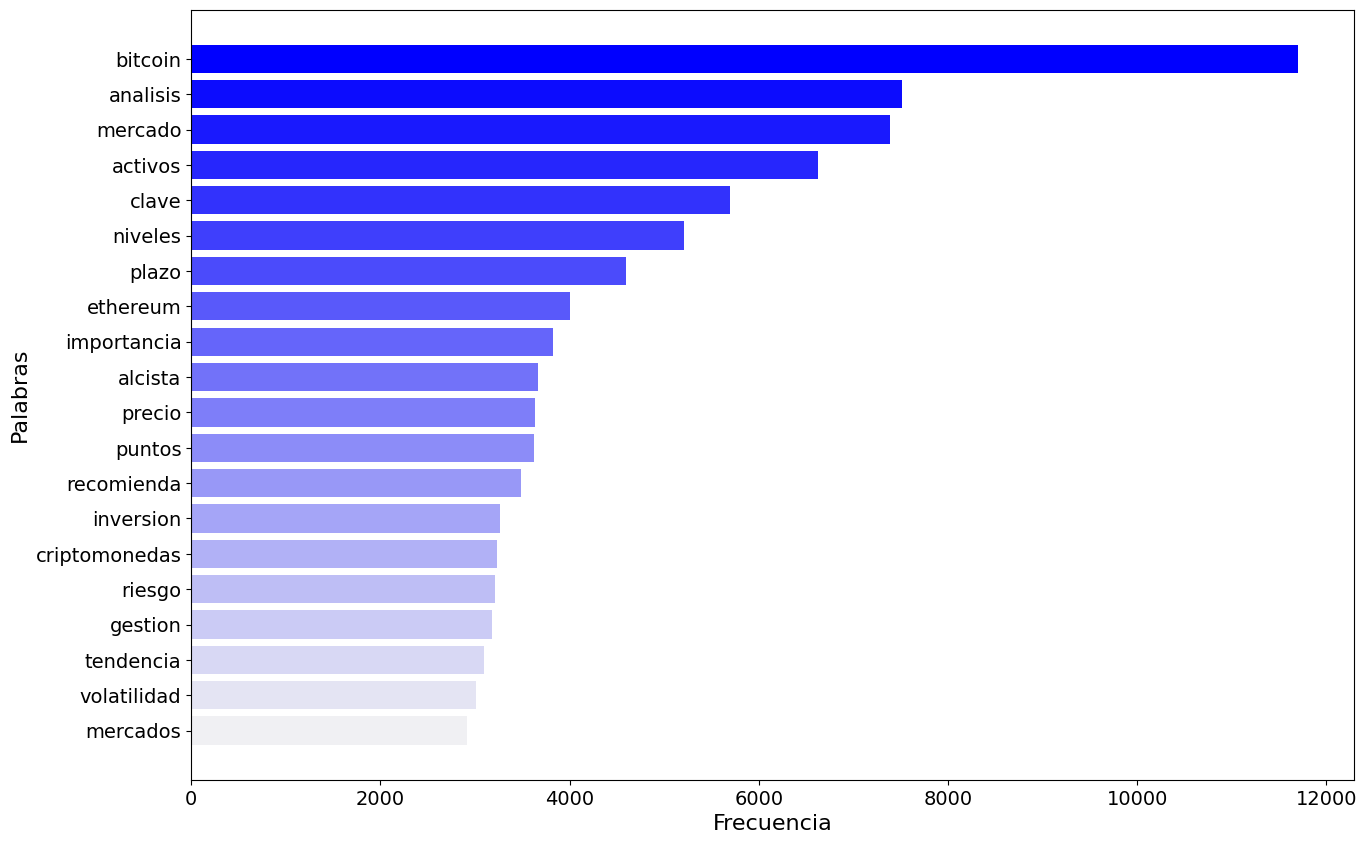

In [42]:
prepro_tokens = preprocesamiento_and_stopwords(all_tokens)
analisis_grafico_3(prepro_tokens, 20)

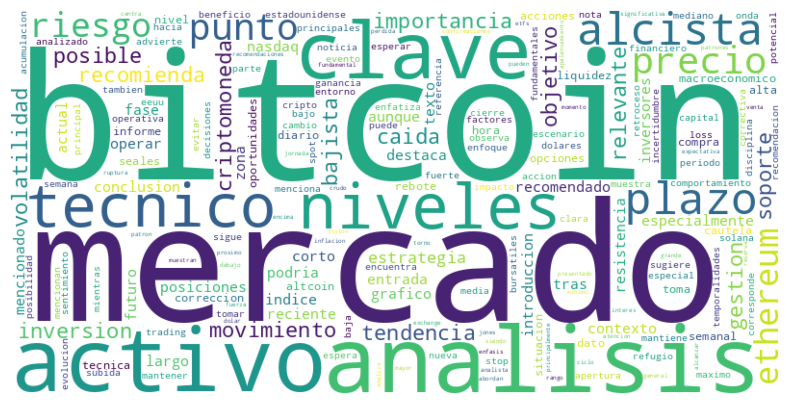

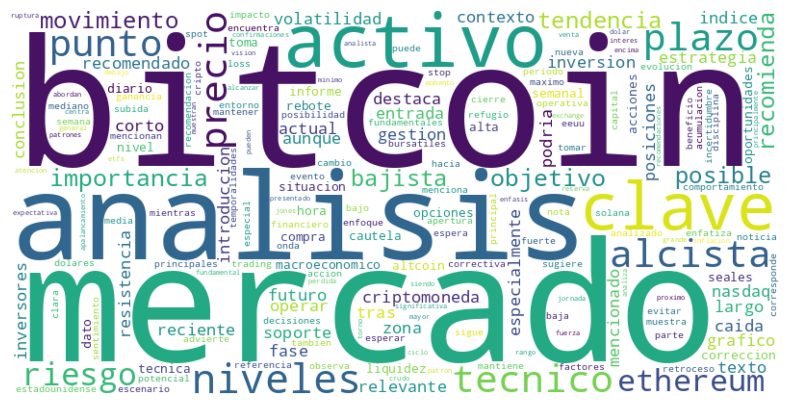

In [43]:
# Combinar todos los textos en un solo string
text = " ".join(prepro_tokens)



for interpolation in [False, True]:
    # Mostrar la nube de palabras
    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='hamming') #'nearest', 'bilinear', 'bicubic', 'hanning', 'hamming', 'hermite', 'gaussian'
    plt.axis("off")
    plt.show()

In [44]:
key_terms = df['key_terms'].values
list_all_terms = [re.sub(r" \([^()]*\)", "", term.strip()) for sublist in key_terms for term in sublist]

In [45]:
def preprocesamiento_and_stopwords(all_tokens):
    stop_words_nltk = set(stopwords.words('spanish'))
    prepro_tokens = [quitar_tildes(w) for w in all_tokens]
    prepro_tokens = [w.lower() for w in prepro_tokens]
    
    # Mantener "S&P 500" como una sola entidad
    prepro_tokens = ['sp500' if 's&p' in w.lower() else w for w in prepro_tokens]
    
    # Eliminar caracteres especiales excepto en "s&p500"
    prepro_tokens = [re.sub(r'[^A-Za-z0-9]+','',w) if w != 's&p500' else w for w in prepro_tokens]
    
    prepro_tokens = [w for w in prepro_tokens if w not in stop_words_nltk]
    prepro_tokens = [w for w in prepro_tokens if len(w)>1]
    
    return prepro_tokens

Size BoW = 3696


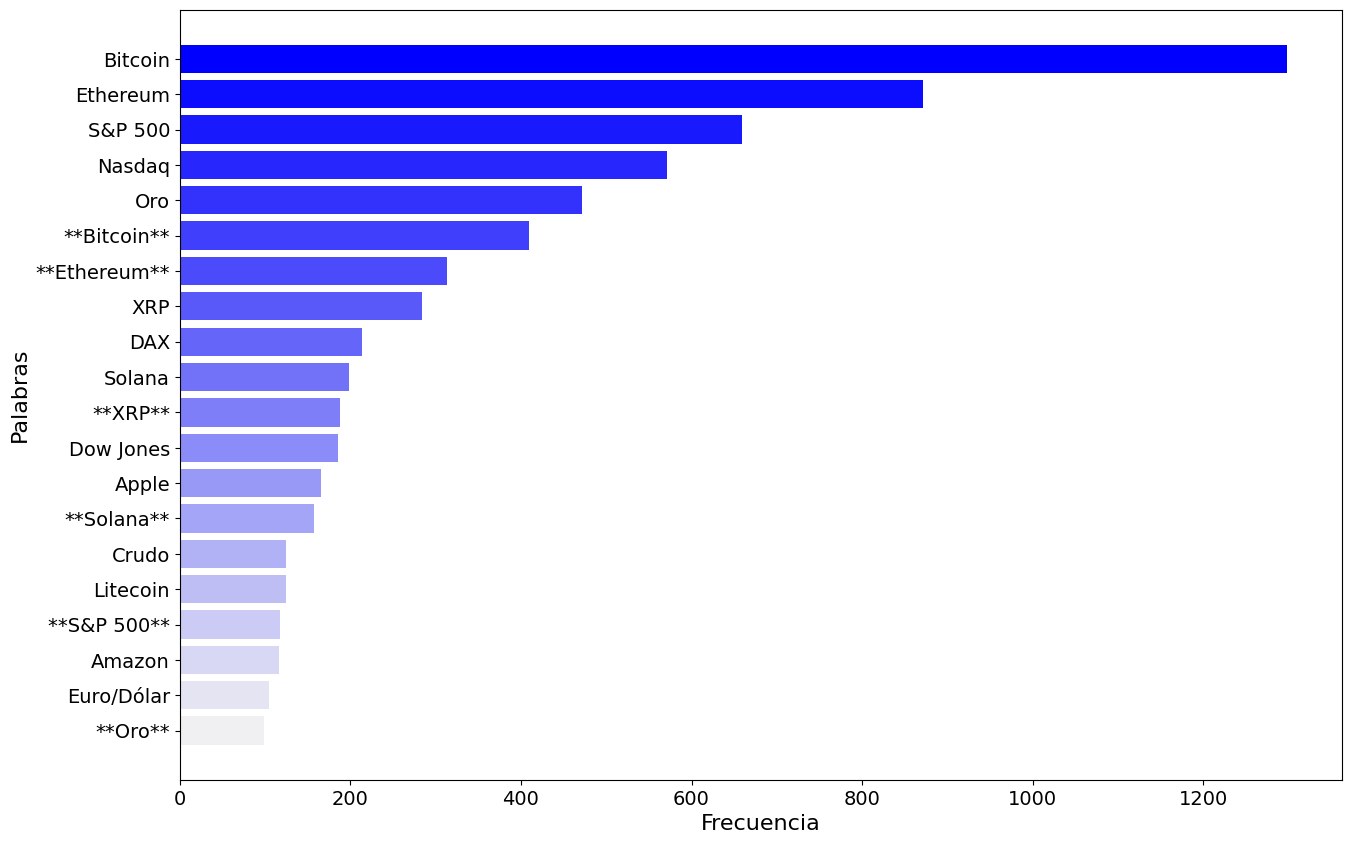

Size BoW = 2754


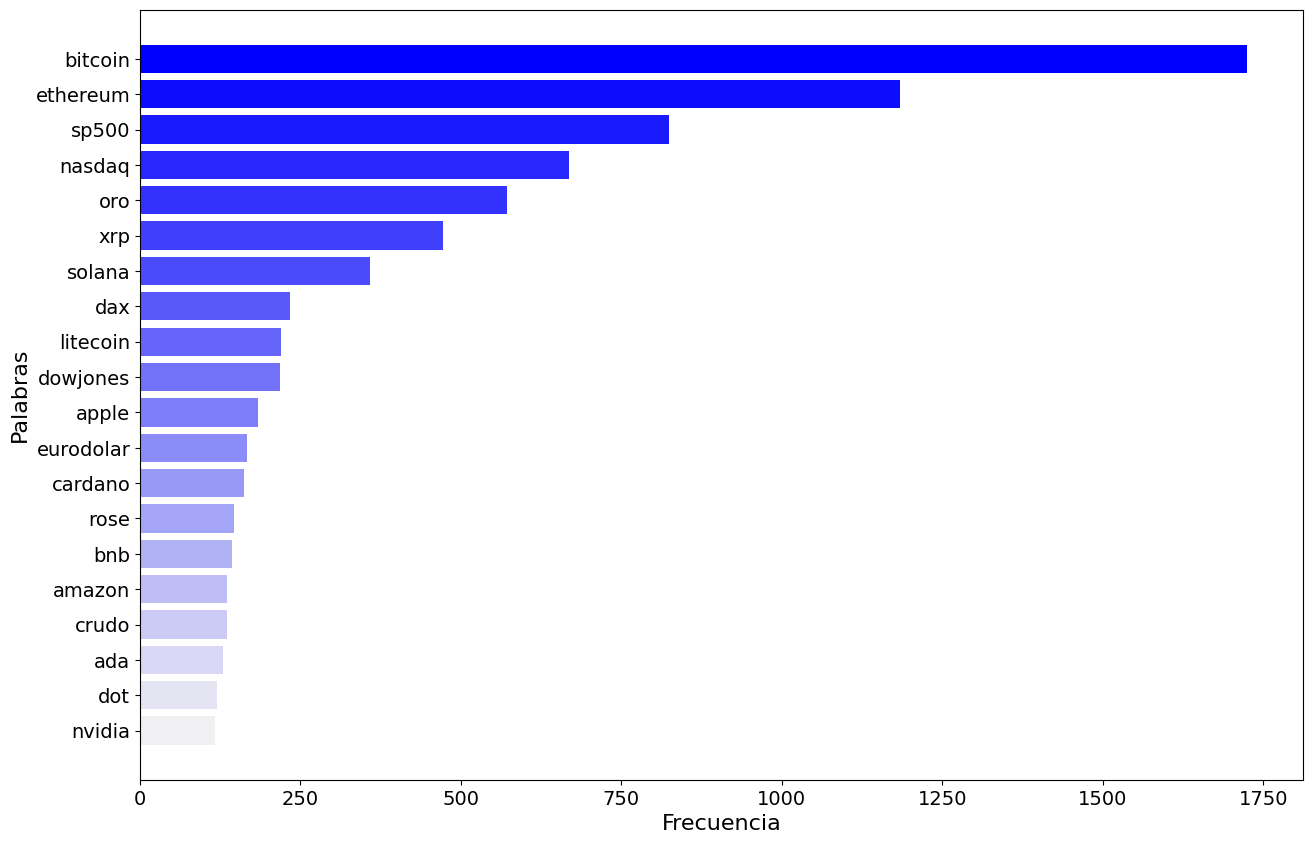

In [51]:
analisis_grafico_3(list_all_terms,20)

prepro_tokens = preprocesamiento_and_stopwords(list_all_terms)
analisis_grafico_3(prepro_tokens,20)

### lematizacion y stemmer

In [47]:
#Lemmatization y stemmer

from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer

def preprocesamiento_lematizacion_stemming(tokens):
    lancaster = LancasterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()

    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="n") for w in prepro_tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="a") for w in prepro_tokens ]
    prepro_tokens = [wordnet_lemmatizer.lemmatize(w, pos="r") for w in prepro_tokens ]

    prepro_tokens = [lancaster.stem(w) for w in prepro_tokens]
    prepro_tokens = [w for w in prepro_tokens if len(w)>2]

    return prepro_tokens


In [50]:
prepro_tokens = preprocesamiento_lematizacion_stemming(prepro_tokens)

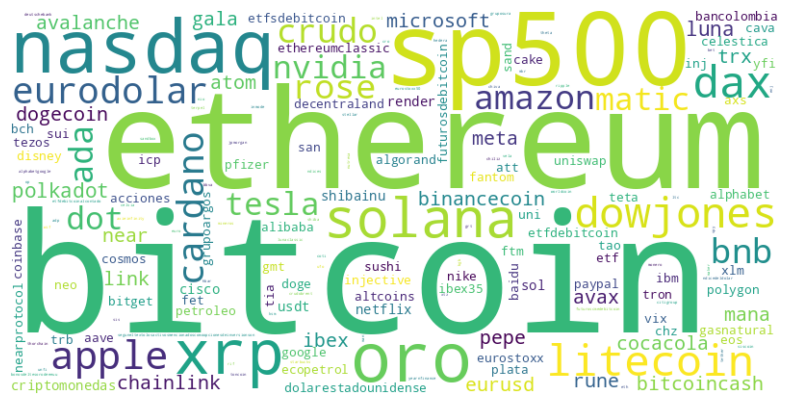

In [52]:
# Combinar todos los textos en un solo string
text = " ".join(prepro_tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

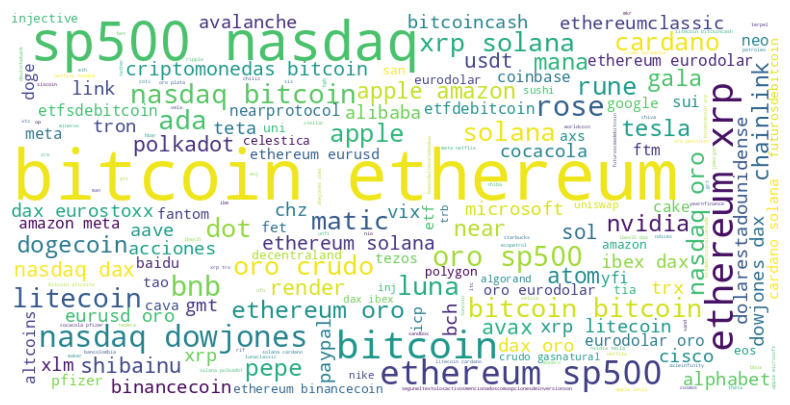

In [53]:
# Combinar todos los textos en un solo string
text = " ".join(prepro_tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=True).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.show()

## Matriz de frecuencia de terminos

In [54]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def crear_matriz_frecuencia_terminos(prepro_tokens: list):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=None)
    
    # Matriz dispersa de frecuencia de términos
    X = vectorizer.fit_transform(prepro_tokens)
    
    # Obtener el vocabulario
    T = vectorizer.get_feature_names_out()

    return X, T

def extraer_topicos_con_LDA(X, T, numero_topicos=5, numero_terminos=10):
    lda = LatentDirichletAllocation(n_components=numero_topicos, random_state=42)
    lda.fit(X)

    # Mostrar los términos más importantes por cada tópico
    for idx, topic in enumerate(lda.components_):
        print(f"Tópico {idx + 1}:")
        top_terminos = [T[i] for i in topic.argsort()[:-numero_terminos - 1:-1]]
        print(" ".join(top_terminos))


X, T = crear_matriz_frecuencia_terminos(prepro_tokens)
extraer_topicos_con_LDA(X, T, numero_topicos=5, numero_terminos=5)

Tópico 1:
oro polkadot chainlink pepe ibex
Tópico 2:
bitcoin ethereum dowjones apple rose
Tópico 3:
xrp dax eurodolar crudo ada
Tópico 4:
nasdaq solana litecoin cardano matic
Tópico 5:
sp500 bnb luna avalanche usdt


In [55]:
extraer_topicos_con_LDA(X, T, numero_topicos=5, numero_terminos=10)

Tópico 1:
oro polkadot chainlink pepe ibex atom dogecoin cocacola near avax
Tópico 2:
bitcoin ethereum dowjones apple rose amazon dot nvidia tesla rune
Tópico 3:
xrp dax eurodolar crudo ada trx gala render shibainu netflix
Tópico 4:
nasdaq solana litecoin cardano matic eurusd mana bitcoincash cisco sol
Tópico 5:
sp500 bnb luna avalanche usdt eurostoxx dolarestadounidense nearprotocol paypal gasnatural
